In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
import glob
import csv
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
articleInformationPaths = ['.\\TOM_Dataset\\TOM_Dataset_Inset\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Business\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_National\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Opinion\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Sport\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_World\\Article_Information.csv']
imageInformationPaths = ['.\\TOM_Dataset\\TOM_Dataset_Inset\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Business\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_National\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Opinion\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Sport\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_World\\Image_Information.csv']
imagePaths = ['.\\TOM_Dataset\\TOM_Dataset_Inset\\img', '.\\TOM_Dataset\\TOM_Dataset_Business\\img', '.\\TOM_Dataset\\TOM_Dataset_National\\img', '.\\TOM_Dataset\\TOM_Dataset_Opinion\\img', '.\\TOM_Dataset\\TOM_Dataset_Sport\\img', '.\\TOM_Dataset\\TOM_Dataset_World\\img']

In [3]:
insetList = []
notInsetList = []
insetCounter = 0
notInsetCounter = 0
for (imagePath, imageInformationPath) in zip(imagePaths, imageInformationPaths):
    csvFile = pd.read_csv(imageInformationPath)
    for (filename, fileInformation) in zip(glob.glob(imagePath + "/*"), csvFile["Inset"]):
        print(filename)
        image = Image.open(filename)
        if fileInformation == True:
            insetList.append(image)
            image.save('.\\TOM_Classification\\inset\\Image'+str(insetCounter)+".jpg")
            insetCounter += 1
        else:
            image.save('.\\TOM_Classification\\notinset\\Image'+str(notInsetCounter)+".jpg")
            notInsetCounter += 1

print(len(insetList))
# print(len(notInsetList))

.\TOM_Dataset\TOM_Dataset_Inset\img\img00000.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00001.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00002.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00003.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00004.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00005.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00006.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00007.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00008.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00009.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00010.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00011.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00012.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00013.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00014.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00015.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00016.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00017.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00018.jpg
.\TOM_Dataset\TOM_Dataset_Inset\img\img00019.jpg
.\TOM_Dataset\TOM_Da

In [4]:
batch_size = 32
img_height = 180
img_width = 180
dataDirectory = ".\\TOM_Classification\\"

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataDirectory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1440 files belonging to 2 classes.
Using 1152 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataDirectory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1440 files belonging to 2 classes.
Using 288 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['inset', 'notinset']


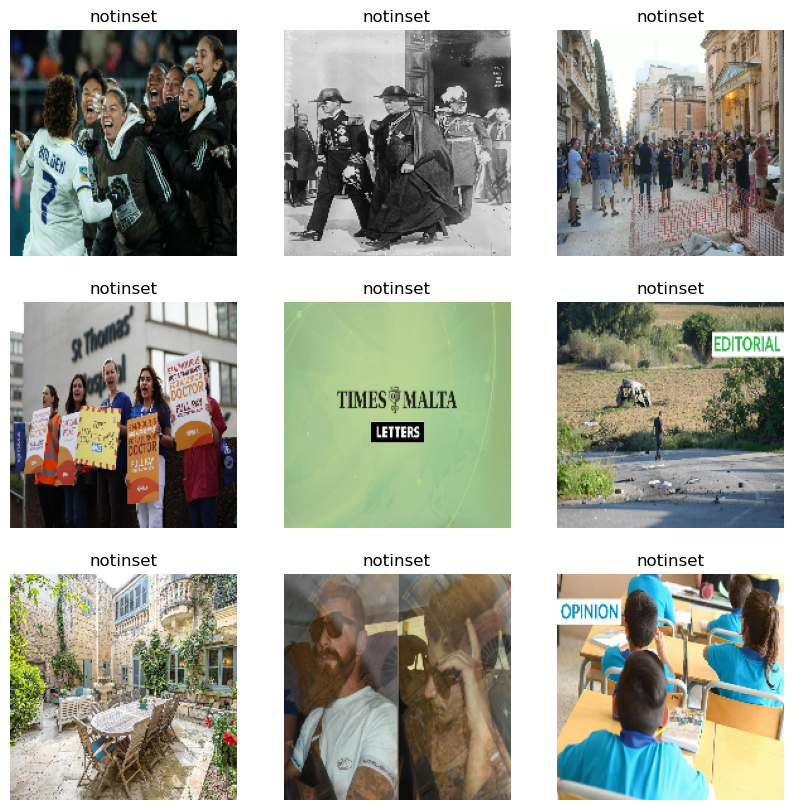

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [15]:
epochs=6
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/6
36/36 [==============================] - 11s 282ms/step - loss: 0.2551 - accuracy: 0.9201 - val_loss: 0.2311 - val_accuracy: 0.9479
Epoch 2/6
36/36 [==============================] - 9s 256ms/step - loss: 0.2058 - accuracy: 0.9462 - val_loss: 0.1940 - val_accuracy: 0.9479
Epoch 3/6
36/36 [==============================] - 9s 258ms/step - loss: 0.2143 - accuracy: 0.9462 - val_loss: 0.2045 - val_accuracy: 0.9479
Epoch 4/6
36/36 [==============================] - 9s 258ms/step - loss: 0.1898 - accuracy: 0.9462 - val_loss: 0.1677 - val_accuracy: 0.9479
Epoch 5/6
36/36 [==============================] - 9s 263ms/step - loss: 0.1465 - accuracy: 0.9462 - val_loss: 0.1598 - val_accuracy: 0.9479
Epoch 6/6
36/36 [==============================] - 9s 252ms/step - loss: 0.1121 - accuracy: 0.9462 - val_loss: 0.2682 - val_accuracy: 0.9479


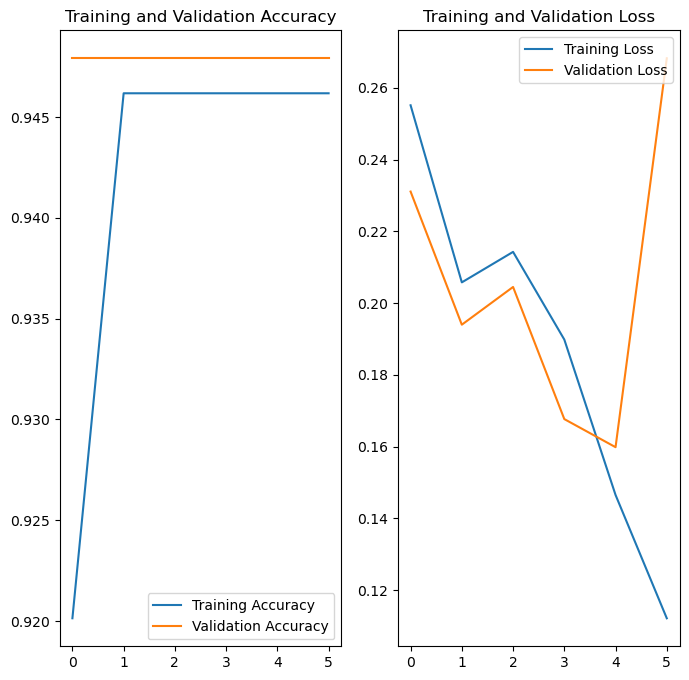

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()